# Aprendizagem 2024/25

## Homework I - Notebook

### ist105901 and ist106943

In [2]:
import pandas as pd, numpy as np
from scipy.io.arff import loadarff

# Reading the ARFF file
data = loadarff('diabetes.arff')
df = pd.DataFrame(data[0])
df['Outcome'] = df['Outcome'].str.decode('utf-8')


## 1)

In [3]:
from sklearn.feature_selection import f_classif

X = df.drop('Outcome', axis=1)
Y = df['Outcome']

f_statistics = f_classif(X, Y)

a = {f_statistics[0][_]:X.columns.values[_] for _ in range(f_statistics[0].size)}
print(f'The input variable with the worst discriminative power is {a[min(f_statistics[0])]} with a score of {min(f_statistics[0])}')
print(f'The input variable with the best discriminative power is {a[max(f_statistics[0])]} with a score of {max(f_statistics[0])}')

The input variable with the worst discriminative power is BloodPressure with a score of 3.256950397889028
The input variable with the best discriminative power is Glucose with a score of 213.16175217803828


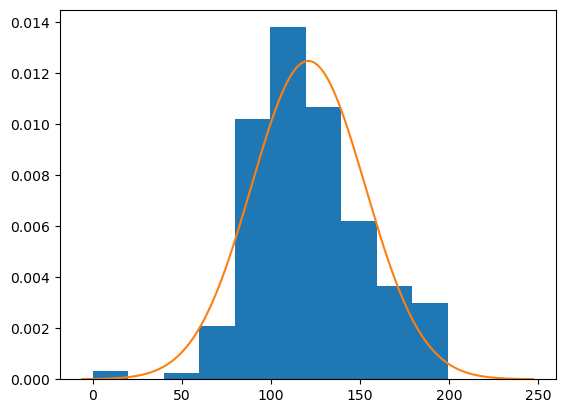

In [4]:
    from matplotlib import pyplot
from scipy.stats import norm

mean = np.mean(df['Glucose'])
std_dev = np.std(df['Glucose'])
dist = norm(mean, std_dev)

values = [value for value in range(int(mean - 4*std_dev), int(mean + 4*std_dev))]
probabilities = [dist.pdf(value) for value in values]

pyplot.hist(df['Glucose'], bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

69.10546875


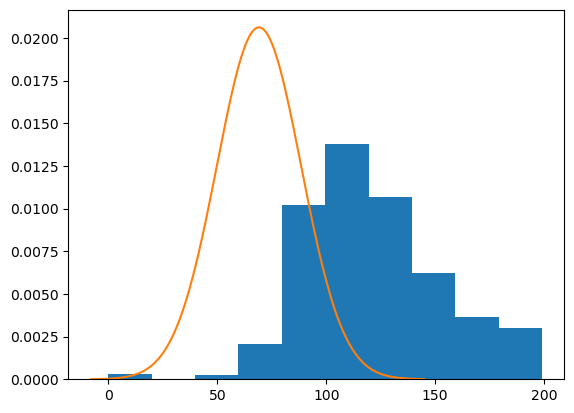

In [5]:
from matplotlib import pyplot
from scipy.stats import norm

mean = np.mean(df['BloodPressure'])
print(mean)
std_dev = np.std(df['BloodPressure'])
dist = norm(mean, std_dev)

values = [value for value in range(int(mean - 4*std_dev), int(mean + 4*std_dev))]
probabilities = [dist.pdf(value) for value in values]

pyplot.hist(df['Glucose'], bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()